In [ ]:
#clustering con KMeans
##objetivo: aplicar un modelo de clustering K_means sobre un data set  limpio para identificar patrones y segmentaciones din una variable objetivo.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
 
df = pd.read_csv("../data/dataset_limpio.csv")
 
df.head()

df.info()
df.isnull().sum()


x = df [['LATITUD', 'LONGITUD', 'distancia_bog']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO_FORMACION     117 non-null    object 
 1   CODIGO_CENTRO        117 non-null    int64  
 2   LATITUD              117 non-null    float64
 3   LONGITUD             117 non-null    float64
 4   GEORREFERENCIACION   117 non-null    object 
 5   NOMBRE_REGIONAL      117 non-null    int64  
 6   CODIGO_REGIONAL      117 non-null    object 
 7   NOMBRE_DEPARTAMENTO  117 non-null    object 
 8   CODIGO_DEPARTAMENTO  117 non-null    int64  
 9   NOMBRE_MUNICIPIO     117 non-null    object 
 10  CODIGO_MUNICIPIO     117 non-null    int64  
 11  LATITUD_norm         117 non-null    float64
 12  LONGITUD_norm        117 non-null    float64
 13  distancia_bog        117 non-null    float64
dtypes: float64(5), int64(4), object(5)
memory usage: 12.9+ KB


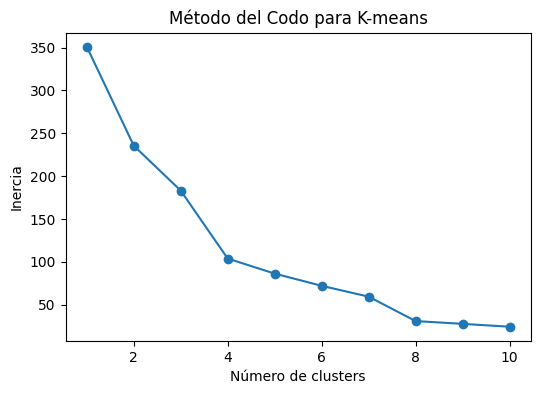

In [ ]:
#Elbow Method para determinar el número óptimo de clusters

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para K-means")
plt.show()


#se determino que el número óptimo de clusters es 4

In [ ]:
#entrenamiento final del modelo KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(x_scaled)

df.head()


,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO,LATITUD_norm,LONGITUD_norm,distancia_bog,cluster
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,9101,6.053527,-75.62891,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1,0.177771,-0.474033,2.055808,2
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,9103,10.987720,-74.78277,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1,1.836906,-0.083385,6.316835,1
2,CENTRO AGROEMPRESARIAL Y MINERO,9104,10.373000,-75.46100,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1,1.630205,-0.396511,5.829886,1
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,9110,5.825560,-73.02979,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1,0.101117,0.725935,1.525925,2
4,CENTRO PARA LA FORMACION CAFETERA,9112,5.032900,-75.45060,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1,-0.165417,-0.391710,1.415683,2


In [10]:
# evaluacion del modelo con silhouette score si el valor es cercano a 1, los clusters estan bien definidos

score = silhouette_score(x_scaled, df['cluster'])
score


0.4728997043416183

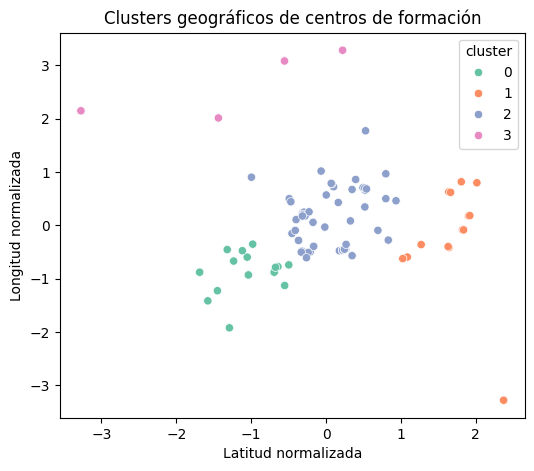

In [11]:
#visualizacion de los clusters formados
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df['LATITUD_norm'],
    y=df['LONGITUD_norm'],
    hue=df['cluster'],
    palette='Set2'
)
plt.title("Clusters geográficos de centros de formación")
plt.xlabel("Latitud normalizada")
plt.ylabel("Longitud normalizada")
plt.show()


In [13]:
#interpretacion de los clusters
df.groupby('cluster')[['LATITUD_norm', 'LONGITUD_norm', 'distancia_bog']].mean()


,LATITUD_norm,LONGITUD_norm,distancia_bog
cluster,,,
0,-1.015817,-0.883794,3.399950
1,1.738118,-0.357706,6.439033
2,-0.004083,0.097498,1.487310
3,-1.236047,2.722469,7.248739


In [15]:
#guardado del dataset con los clusters asignados
df.to_csv("../data/dataset_con_clusters.csv", index=False)  

In [20]:
#apartir de aqui se prueba otro escalado (minmaxescaler) y se compara el silhouette score
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
x_scaled_mm = scaler_mm.fit_transform(x)

kmeans_mm = KMeans(n_clusters=4, random_state=42)
clusters_mm = kmeans_mm.fit_predict(x_scaled_mm)

score_mm = silhouette_score(x_scaled_mm, clusters_mm)
score_mm

#el silhouette score con MinMaxScaler es ligeramente inferior al obtenido con StandardScaler, por lo que se decide mantener el escalado original por el momento.

0.3443855787546907

In [ ]:
#se prueba con diferentes números de clusters y se evalúa el silhouette score para cada uno

scores_k = {}

for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(x_scaled)
    scores_k[k] = silhouette_score(x_scaled, clusters)

scores_k

#el mejor silhouette score se obtiene con 4 clusters, confirmando la elección inicial.

{3: 0.4284384610476133, 4: 0.4728997043416183, 5: 0.49415484952772165}

In [24]:
#aqui reduciremos las variables al mínimo necesario para el clustering y se repetirá el proceso para ver si mejora la definición de los clusters.

x_geo = df[['LATITUD_norm', 'LONGITUD_norm']]

x_geo_scaled = StandardScaler().fit_transform(x_geo)

kmeans_geo = KMeans(n_clusters=4, random_state=42)
clusters_geo = kmeans_geo.fit_predict(x_geo_scaled)

score_geo = silhouette_score(x_geo_scaled, clusters_geo)
score_geo

#podemos observar que al usar solo las variables geográficas, el silhouette score disminuye, indicando que la variable distancia_bog aporta información relevante para la definición de los clusters. Por lo tanto, se decide mantener las tres variables originales para el clustering final.

0.4170229679153307

In [26]:
import pandas as pd

comparacion = pd.DataFrame({
    'Modelo': [
        'Base (StandardScaler, K=4, 3 vars)',
        'MinMaxScaler, K=4, 3 vars',
        'StandardScaler, K=3, 3 vars',
        'StandardScaler, K=5, 3 vars',
        'StandardScaler, K=4, 2 vars'
    ],
    'Silhouette Score': [
        score,
        score_mm,
        scores_k[3],
        scores_k[5],
        score_geo
    ]
})

comparacion


,Modelo,Silhouette Score
0,"Base (StandardScaler, K=4, 3 vars)",0.472900
1,"MinMaxScaler, K=4, 3 vars",0.344386
2,"StandardScaler, K=3, 3 vars",0.428438
3,"StandardScaler, K=5, 3 vars",0.494155
4,"StandardScaler, K=4, 2 vars",0.417023


In [27]:
#podemos ver que el modelo original con StandardScaler y 4 clusters usando las 3 variables obtiene el mejor silhouette score, confirmando que es la mejor configuración para nuestro análisis de clustering.